# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [14]:
# Load neccesary modules
import re
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def mapState(STATE='Louisiana', COUNTING='cases'):
    """This function will plot cumulative number number of cases or deaths per state"""
    """Arguments: ('1','2') where 1 = State and 2 = cases or deaths"""
    
    #Read the database and extract all: 1.dates, 2. number of cases, and 3.number of deaths, from a particular American state     
    #By default 'Louisiana'
    covid = open('../covidData_4.7.20.csv', 'r')
    state = re.findall(r'(.+),.+,{},.*,(.+),(.+)'.format(STATE), covid.read())
    covid.close()
    #Crate a file with this information
    g01 = open('graphState.csv', 'w')
    for _ in state:
        date = _[0]
        cases = _[1]
        deaths = _[2]
        g01.write('%s,%s,%s' %(date,cases,deaths)+'\n')
    g01.close()
    
    #Open the file as a dataframe, and sum how many cases and deaths occurred per day. Create a new file with this information
    st = pd.read_csv('graphState.csv', header=None)
    countDay = st.groupby([0], sort=False).sum()
    countDay.to_csv('countDay.csv', header=None)
    #With the last file, create a list that includes all dates
    cD = open('countDay.csv', 'r')
    x = re.findall(r'(.+-.+-.+),.+,.+', cD.read())
    cD.close()
    #With the last file, create a list that includes all cases per day
    cD = open('countDay.csv', 'r')
    yCases = re.findall(r'.+,(.+),.+', cD.read())
    cD.close()
    #With the last file, create a list that includes all deaths per day
    cD = open('countDay.csv', 'r')
    yDeaths = re.findall(r'.+,.+,(.+)', cD.read())
    cD.close()
    #In number of cases per day, change string elements (in the list) to digits
    yCases2=[]
    for _ in yCases:
        yy=[]
        yy=int(_)
        yCases2.append(yy)
    #In number of deaths per day, change string elements (in the list) to digits
    yDeaths2=[]
    for _ in yDeaths:
        yy=[]
        yy=int(_)
        yDeaths2.append(yy)    

    #Plot cases number of cases or deaths, according to the second argument typed by user. By default 'cases'
    if '{}'.format(COUNTING) == 'cases':        
        plt.title('{}'.format(STATE))
        plt.xlabel('Date')
        plt.xticks(rotation=90)
        plt.ylabel('Cases')
        plt.plot(x,yCases2)
        plt.grid(True)
        plt.show()
    elif '{}'.format(COUNTING) == 'deaths':        
        plt.title('{}'.format(STATE))
        plt.xlabel('Date')
        plt.xticks(rotation=90)
        plt.ylabel('Deaths')
        plt.plot(x,yDeaths2)
        plt.grid(True)
        plt.show()

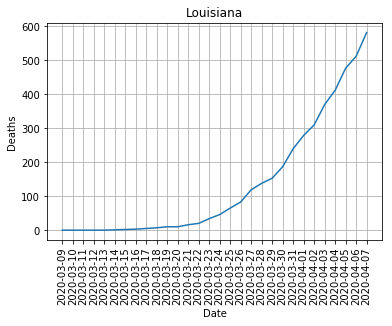

In [16]:
mapState('Louisiana','deaths')

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [17]:
def mapCounty(COUNTY='East Baton Rouge',STATE='Louisiana', COUNTING='cases'):
    """This function will plot cumulative number number of cases or deaths per county"""
    """Arguments: ('1','2','3') where 1 = County, 2 = State, and 3 = cases or deaths"""
    
    #Read the database and extract all: 1.dates, 2. number of cases, and 3.number of deaths, from a particular American county.     
    #By default 'East Baton Rouge','Louisiana'
    covid = open('../covidData_4.7.20.csv', 'r')
    state = re.findall(r'(.+),{},{},.*,(.+),(.+)'.format(COUNTY,STATE), covid.read())
    covid.close()
    #Crate a file with this information
    g01 = open('graphState.csv', 'w')
    for _ in state:
        date = _[0]
        cases = _[1]
        deaths = _[2]
        g01.write('%s,%s,%s' %(date,cases,deaths)+'\n')
    g01.close()
    
    #Open the file as a dataframe, and sum how many cases and deaths occurred per day. Create a new file with this information
    st = pd.read_csv('graphState.csv', header=None)
    countDay = st.groupby([0], sort=False).sum()
    countDay.to_csv('countDay.csv', header=None)
    #With the last file, create a list that includes all dates
    cD = open('countDay.csv', 'r')
    x = re.findall(r'(.+-.+-.+),.+,.+', cD.read())
    cD.close()
    #With the last file, create a list that includes all cases per day
    cD = open('countDay.csv', 'r')
    yCases = re.findall(r'.+,(.+),.+', cD.read())
    cD.close()
    #With the last file, create a list that includes all deaths per day
    cD = open('countDay.csv', 'r')
    yDeaths = re.findall(r'.+,.+,(.+)', cD.read())
    cD.close()
    #In number of cases per day, change string elements (in the list) to digits
    yCases2=[]
    for _ in yCases:
        yy=[]
        yy=int(_)
        yCases2.append(yy)
    #In number of deaths per day, change string elements (in the list) to digits
    yDeaths2=[]
    for _ in yDeaths:
        yy=[]
        yy=int(_)
        yDeaths2.append(yy)    

    #Plot cases number of cases or deaths, according to the second argument typed by user. By default 'cases'
    if '{}'.format(COUNTING) == 'cases':        
        plt.title('{} - {}'.format(COUNTY,STATE))
        plt.xlabel('Date')
        plt.xticks(rotation=90)
        plt.ylabel('Cases')
        plt.plot(x,yCases2)
        plt.grid(True)
        plt.show()
    elif '{}'.format(COUNTING) == 'deaths':        
        plt.title('{} - {}'.format(COUNTY,STATE))
        plt.xlabel('Date')
        plt.xticks(rotation=90)
        plt.ylabel('Deaths')
        plt.plot(x,yDeaths2)
        plt.grid(True)
        plt.show()

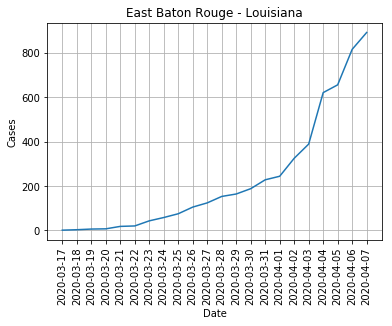

In [18]:
mapCounty('East Baton Rouge','Louisiana','cases')